In [1]:
# importing libraries
import numpy  as np
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.linear_model import LinearRegression


# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)



In [2]:
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<b>Apprentice Chef | Analysis Report to Management</b>
 
 **Author: Carlos Gallegos**
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h2>Presenting the Problem</h2><br>

The manging team presented  two main business questions:

* Forecast on  future revenue base on user characteristics
* Classify the probability of a customer to accept the cross-selling offer:half-bottle of wine

    


<h2>Initial Exploration of the Dataset</h2><br>
We started  exploring the information present on the dataset like 
null values, outliers, or any other information affecting the data


In [3]:

# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice_chef = pd.read_excel(file)

In [4]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Dataset
------------------------
Observations: {apprentice_chef.shape[0]}
Features:     {apprentice_chef.shape[1]}
""")



Size of Dataset
------------------------
Observations: 1946
Features:     28






<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Part 1: Regression Model for Revenue </h2><br>



Our Goal here is to predict the future revenue a potential client will generate after a year. A regression model allow to generate a forecast base on different variables. To generate an accurate value we start by setting our target or y-value :Revenue 

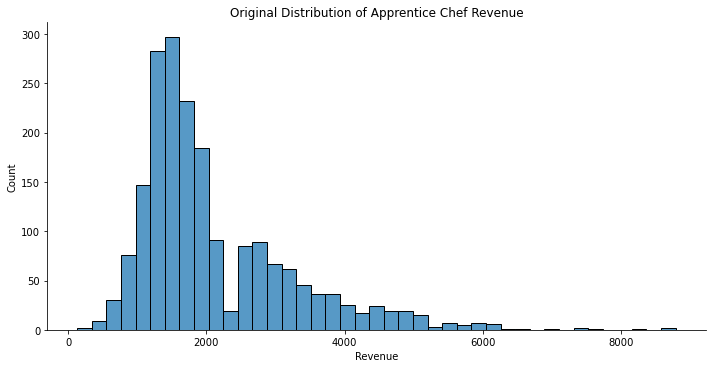

Revenue Median :1740.0
The distribution of revenue is skewed to the left wirh a median of 1740 USD, to eliminate the skewness we apply a log transformation


In [5]:
# Develop a histogram to analyze the distribution of the Y-variable.
sns.displot(data   = apprentice_chef,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)



plt.title(label   = "Original Distribution of Apprentice Chef Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

print(f"""Revenue Median :{apprentice_chef['REVENUE'].median()}
The distribution of revenue is skewed to the left wirh a median of 1740 USD, to eliminate the skewness we apply a log transformation""")

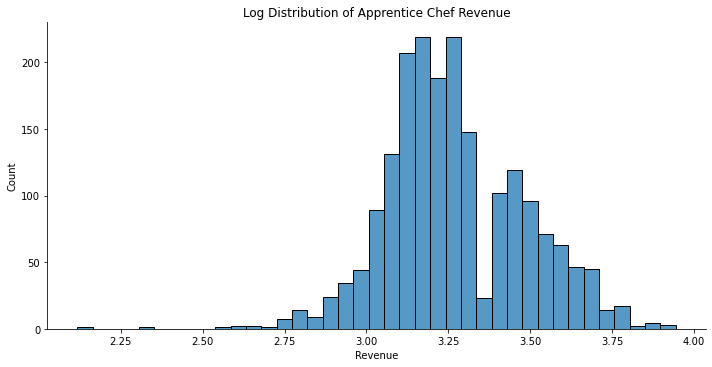

 The distrubution is more similar to a normal distribution after the transformation
 
 Median= 3.25


In [6]:
# Develop a histogram to analyze the distribution of the Y-variable. We Applied LOG because it is skew to the left

apprentice_chef['log_REVENUE'] = np.log10(apprentice_chef['REVENUE'])

sns.displot(data   = apprentice_chef,
            x      = 'log_REVENUE',
            height = 5,
            aspect = 2)



plt.title(label   = "Log Distribution of Apprentice Chef Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

print(f""" The distrubution is more similar to a normal distribution after the transformation
 
 Median= 3.25""")

In [7]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice_chef.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice_chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df
#changing names
email_df.columns = ['0' , 'email_domain']

# email domain types
personal_email_domains = ['gmail.com', 'yahoo.com','protonmail.com' ]
junk_email_domains=['msn.com','aol.com','hotmail.com','live.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in email_df['email_domain']:
    
    if  domain in personal_email_domains:
        placeholder_lst.append('personal')
    
    elif domain in junk_email_domains:
        placeholder_lst.append('junk')    

    else:
        placeholder_lst.append('professional')

# concatenating with original DataFrame
email_df['domain_group'] = pd.Series(placeholder_lst)


# checking results
email_df['domain_group'].value_counts()

TYPE_MAIL=email_df['domain_group']
apprentice_chef=apprentice_chef.join(TYPE_MAIL)
apprentice_chef = apprentice_chef.rename(columns={'domain_group': 'TYPE_MAIL'})

In [8]:
#CREATING NEW FLAG COLUMN AVERAGE ORDER SIZE TO CLASSIFIY: SMALL, MEDIUM, LARGE 
#RENAMING LABEL LARGE FOR AVERAGE
apprentice_chef = apprentice_chef.rename(columns={'LARGEST_ORDER_SIZE': 'AVERAGE_ORDER_SIZE'}) 
apprentice_chef['AVERAGE_ORDER_SIZE'].value_counts()


apprentice_chef['ORDER_SIZE']     = 0

for index, value in apprentice_chef.iterrows():
    
    # Total_Photos Viewed
    if (apprentice_chef.loc[index, 'AVERAGE_ORDER_SIZE'] > 0) and (apprentice_chef.loc[index, 'AVERAGE_ORDER_SIZE'] <4):
        apprentice_chef.loc[index, 'ORDER_SIZE'] = 'SMALL'
    elif (apprentice_chef.loc[index, 'AVERAGE_ORDER_SIZE'] > 4) and (apprentice_chef.loc[index, 'AVERAGE_ORDER_SIZE']<7):
        apprentice_chef.loc[index, 'ORDER_SIZE'] = 'MEDIUM'
    else:
         apprentice_chef.loc[index, 'ORDER_SIZE'] = 'LARGE'

In [9]:
#CONVERTING variables with no zero values  to log 

apprentice_chef['log_TOTAL_MEALS_ORDERED'] = np.log10(apprentice_chef['TOTAL_MEALS_ORDERED'])
apprentice_chef['log_AVG_PREP_VID_TIME'] = np.log10(apprentice_chef['AVG_PREP_VID_TIME'])
apprentice_chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(apprentice_chef['AVG_TIME_PER_SITE_VISIT'])
apprentice_chef['log_UNIQUE_MEALS_PURCH'] = np.log10(apprentice_chef['UNIQUE_MEALS_PURCH'])
apprentice_chef['log_AVG_CLICKS_PER_VISIT'] = np.log10(apprentice_chef['AVG_CLICKS_PER_VISIT'])
apprentice_chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'])
apprentice_chef['log_MEDIAN_MEAL_RATING'] = np.log10(apprentice_chef['MEDIAN_MEAL_RATING'])
apprentice_chef['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(apprentice_chef['PRODUCT_CATEGORIES_VIEWED'])
apprentice_chef['log_AVERAGE_ORDER_SIZE'] = np.log10(apprentice_chef['AVERAGE_ORDER_SIZE'])



In [10]:
# dummy variable for viewing photos and weekly plan
apprentice_chef['PHOTO_VIEWED']      = 0
apprentice_chef['WITH_WEEKLY_PLAN']     = 0

for index, value in apprentice_chef.iterrows():
    
    # Total_Photos Viewed
    if apprentice_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        apprentice_chef.loc[index, 'PHOTO_VIEWED'] = 1
    
    if apprentice_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        apprentice_chef.loc[index, 'WITH_WEEKLY_PLAN'] = 1
        
#creating two variables by adding cancelations before and after noon  as total cancelations
#creating variables adding mobiles and pc logins as total logins

# total cancellations
apprentice_chef['TOTAL_CANCELATIONS'] = apprentice_chef['CANCELLATIONS_BEFORE_NOON'] + apprentice_chef['CANCELLATIONS_AFTER_NOON'] 

#TOTAL LOGINS
apprentice_chef['TOTAL_LOGINS'] = apprentice_chef['PC_LOGINS'] + apprentice_chef['MOBILE_LOGINS'] 



In [11]:
# one hot encoding categorical variables : type mail, gender and order size 
one_hot_TYPE_MAIL       = pd.get_dummies(apprentice_chef['TYPE_MAIL'])
#one_hot_GENDER       = pd.get_dummies(apprentice_chef['GENDER'])
one_hot_SIZE       = pd.get_dummies(apprentice_chef['ORDER_SIZE'])
# dropping categorical variables after they've been encoded
apprentice_chef = apprentice_chef.drop('TYPE_MAIL', axis = 1)
#apprentice_chef = apprentice_chef.drop('GENDER', axis = 1)
apprentice_chef = apprentice_chef.drop('ORDER_SIZE', axis = 1)
# joining codings together
apprentice_chef = apprentice_chef.join([one_hot_TYPE_MAIL])
#apprentice_chef = apprentice_chef.join([one_hot_GENDER])
apprentice_chef = apprentice_chef.join([one_hot_SIZE])


<h3>Selecting the Features for the model</h3><br>

* We select  variables for the model  using : correlation and P-values 

In [12]:
# making a correlation list on Revenue and our X Variables 
df_model =apprentice_chef.copy()


# dropping SalePrice and Order from the explanatory variable set
df_model_LOG = df_model.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME','CONTACTS_W_CUSTOMER_SERVICE',
                          'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT',                   
                         'WEEKLY_PLAN',  'MEDIAN_MEAL_RATING','REVENUE',
                         'AVG_CLICKS_PER_VISIT','AVERAGE_ORDER_SIZE','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',  
                         'TOTAL_MEALS_ORDERED','MEDIAN_MEAL_RATING','AVG_PREP_VID_TIME' 
                             ], axis = 1)

# creating a (Pearson) correlation matrix on our first model 
df_corr = df_model_LOG.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['log_REVENUE'].sort_values(ascending = False))



log_REVENUE                        1.00
log_TOTAL_MEALS_ORDERED            0.69
log_AVG_PREP_VID_TIME              0.67
log_MEDIAN_MEAL_RATING             0.61
MASTER_CLASSES_ATTENDED            0.47
log_AVERAGE_ORDER_SIZE             0.45
TOTAL_PHOTOS_VIEWED                0.43
WITH_WEEKLY_PLAN                   0.39
PHOTO_VIEWED                       0.39
MEDIUM                             0.26
log_AVG_TIME_PER_SITE_VISIT        0.15
LARGE                              0.07
log_CONTACTS_W_CUSTOMER_SERVICE    0.05
MOBILE_NUMBER                      0.04
personal                           0.01
log_PRODUCT_CATEGORIES_VIEWED      0.01
CROSS_SELL_SUCCESS                 0.01
PC_LOGINS                          0.01
TASTES_AND_PREFERENCES             0.01
CANCELLATIONS_BEFORE_NOON          0.01
TOTAL_CANCELATIONS                -0.00
TOTAL_LOGINS                       0.00
professional                       0.00
REFRIGERATED_LOCKER               -0.01
EARLY_DELIVERIES                  -0.01


* Correlation indicates which variables are more likely to affect the result. Total Meals ordered is the variable with the most influence on o revenue,  since when  value increases, our income will do too.


* Number of unique meals sets by the customer negatively affects our revenue; perhaps most of our customers made only one purchase per month, exploring a new menu each time. Not recurrent customers.


<h3>Creating a  regression model</h3><br>

* We generate a regression model to examine the p-values, indicates if the variable is significant, a value too high(over 0.05) means  it  is not statistically significant  and we  discard it, this benefits the final model. 

In [13]:

# Step 1: build a REGRESSION MODEL
lm_best = smf.ols(formula =  """log_REVENUE ~ 

CROSS_SELL_SUCCESS +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
MASTER_CLASSES_ATTENDED +
TOTAL_PHOTOS_VIEWED +
log_TOTAL_MEALS_ORDERED +
log_AVG_PREP_VID_TIME +
log_AVG_TIME_PER_SITE_VISIT +
log_UNIQUE_MEALS_PURCH +
PHOTO_VIEWED +
WITH_WEEKLY_PLAN +
TOTAL_CANCELATIONS +
TOTAL_LOGINS +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_MEDIAN_MEAL_RATING +
log_AVERAGE_ORDER_SIZE +
log_AVG_CLICKS_PER_VISIT +
log_PRODUCT_CATEGORIES_VIEWED +
junk +
personal +
professional +
LARGE +
MEDIUM +
SMALL                            """,
                                data = apprentice_chef)

# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

print(f"""
We examine the result of the regression, and select those variables with a p-value less than 0.05 to generate our OLS Model""")

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     187.7
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:23:09   Log-Likelihood:                 1517.2
No. Observations:                1946   AIC:                            -2978.
Df Residuals:                    1918   BIC:                            -2822.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [14]:
# RELABEL
apprentice_chef = apprentice_chef.rename(columns={'CROSS_SELL_SUCCESS': 'CROSS SELL SUCCESS'})
apprentice_chef = apprentice_chef.rename(columns={'TASTES_AND_PREFERENCES': 'TASTES AND PREFERENCES'})
apprentice_chef = apprentice_chef.rename(columns={'MASTER_CLASSES_ATTENDED': 'MASTER CLASSES ATTENDED'})
apprentice_chef = apprentice_chef.rename(columns={'log_TOTAL_MEALS_ORDERED': 'TOTAL MEALS ORDERED'})
apprentice_chef = apprentice_chef.rename(columns={'log_AVG_PREP_VID_TIME': 'AVERAGE PREPARATION VIDEO TIME'})
apprentice_chef = apprentice_chef.rename(columns={'log_UNIQUE_MEALS_PURCH': 'UNIQUE MEALS PURCHASE'})
apprentice_chef = apprentice_chef.rename(columns={'WITH_WEEKLY_PLAN': 'WITH WEEKLY PLAN'})
apprentice_chef = apprentice_chef.rename(columns={'log_AVG_TIME_PER_SITE_VISIT': 'AVERAGE TIME PER SITE VISIT'})
apprentice_chef = apprentice_chef.rename(columns={'log_CONTACTS_W_CUSTOMER_SERVICE': 'CONTACTS WITH CUSTOMER SERVICE'})
apprentice_chef = apprentice_chef.rename(columns={'log_MEDIAN_MEAL_RATING': 'MEDIAN MEAL RATING'})
apprentice_chef = apprentice_chef.rename(columns={'log_AVERAGE_ORDER_SIZE': 'AVERAGE ORDER SIZE'})
apprentice_chef = apprentice_chef.rename(columns={'log_PRODUCT_CATEGORIES_VIEWED': 'PRODUCT CATEGORIES VIEWED'})  
apprentice_chef = apprentice_chef.rename(columns={'junk': 'JUNK MAIL'})                                                  
apprentice_chef = apprentice_chef.rename(columns={'personal': 'PERSONAL MAIL'}) 
apprentice_chef = apprentice_chef.rename(columns={'professional': 'PROFESSIONAL MAIL'}) 
apprentice_chef = apprentice_chef.rename(columns={'LARGE': 'LARGE ORDER'})   
apprentice_chef = apprentice_chef.rename(columns={'MEDIUM': 'MEDIUM ORDER'})   
apprentice_chef = apprentice_chef.rename(columns={'SMALL': 'SMALL ORDER'})  
apprentice_chef = apprentice_chef.rename(columns={'PHOTO_VIEWED': 'PHOTO VIEWED'})                                                    
apprentice_chef = apprentice_chef.rename(columns={'MOBILE_NUMBER': 'MOBILE NUMBER'})   
apprentice_chef = apprentice_chef.rename(columns={'CANCELLATIONS_BEFORE_NOON': 'CANCELLATIONS BEFORE NOON'})     
apprentice_chef = apprentice_chef.rename(columns={ 'REFRIGERATED_LOCKER':  'REFRIGERATED LOCKER'})          
apprentice_chef = apprentice_chef.rename(columns={'PC_LOGINS': 'PC USER LOGINS'})                      
apprentice_chef = apprentice_chef.rename(columns={'EARLY_DELIVERIES': 'EARLY DELIVERIES'})                      
                   
                

In [15]:
# creating a dictionary to store candidate models
print(f"We choose the variables, with the following description ")

variables_dict = {
  
'Name'   : ['CROSS SELL SUCCESS',
'TASTES AND PREFERENCES', 
'MASTER CLASSES ATTENDED', 
'TOTAL MEALS ORDERED', 
'AVERAGE PREPARATION VIDEO TIME', 
'UNIQUE MEALS PURCHASE', 
'PHOTO VIEWED', 
'WITH WEEKLY PLAN',
'AVERAGE TIME PER SITE VISIT',
'CONTACTS WITH CUSTOMER SERVICE', 
'MEDIAN MEAL RATING', 
'AVERAGE ORDER SIZE', 
'PRODUCT CATEGORIES VIEWED',
'JUNK MAIL',            
'PERSONAL MAIL',
'LARGE ORDER',
'MEDIUM ORDER' ,
'SMALL ORDER'],

'Description':[
    
'Success of the cross-sell promotion',
'Customer specified their tastes and preference',
'Number of times each customer attended a master class', 
'Total number of meals ordered by each customer',    
'Average time in seconds meal preparation instruction',    
'Number of unique meal sets ordered by each customer',  
'If the client viewed or not the photos catalog',
'If the customer has or no a weekly plan',    
'Average time each customer spent per website or mobile app',   
'Number of times each customer made contact with customer service',
'Median rating of meal sets by each customer',    
'Median rating of meal sets by each customer',   
'Total number of meal categories viewed',  
'Register with s junk mail',
'Register with a work mail',   
'Large average order',
'Medium average order',    
'Small average order'    
    
]}
 
variables_dict  = pd.DataFrame(variables_dict)
variables_dict

We choose the variables, with the following description 


,Name,Description
0,CROSS SELL SUCCESS,Success of the cross-sell promotion
1,TASTES AND PREFERENCES,Customer specified their tastes and preference
2,MASTER CLASSES ATTENDED,Number of times each customer attended a maste...
3,TOTAL MEALS ORDERED,Total number of meals ordered by each customer
4,AVERAGE PREPARATION VIDEO TIME,Average time in seconds meal preparation instr...
5,UNIQUE MEALS PURCHASE,Number of unique meal sets ordered by each cus...
6,PHOTO VIEWED,If the client viewed or not the photos catalog
7,WITH WEEKLY PLAN,If the customer has or no a weekly plan
8,AVERAGE TIME PER SITE VISIT,Average time each customer spent per website o...
9,CONTACTS WITH CUSTOMER SERVICE,Number of times each customer made contact wit...


<h3>Creating an OLS model</h3><br>

In [16]:
x_variables=['CROSS SELL SUCCESS',
'TASTES AND PREFERENCES', 
'MASTER CLASSES ATTENDED', 
'TOTAL MEALS ORDERED', 
'AVERAGE PREPARATION VIDEO TIME', 
'UNIQUE MEALS PURCHASE', 
'PHOTO VIEWED', 
'WITH WEEKLY PLAN',
'AVERAGE TIME PER SITE VISIT',
'CONTACTS WITH CUSTOMER SERVICE', 
'MEDIAN MEAL RATING', 
'AVERAGE ORDER SIZE', 
'PRODUCT CATEGORIES VIEWED',
'JUNK MAIL',            
'PERSONAL MAIL',
'LARGE ORDER',
'MEDIUM ORDER' ,
'SMALL ORDER']

In [17]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data  = apprentice_chef.loc[ : ,x_variables]
model_data   = apprentice_chef.drop(['log_REVENUE',
                               'REVENUE',
                               'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'
                               ],
                                axis = 1)

# Preparing the target variable
Revenue_log_target = apprentice_chef.loc[ : ,'log_REVENUE']
Revenue_target = apprentice_chef.loc[ : ,'REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################

# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            model_data,     # x-variables
            Revenue_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            Revenue_log_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [18]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(3))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(3))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(3) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(3)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(3))
lr_test_gap = abs(lr_train_score - lr_test_score).round(3)

print(f"""
*  The OLS model gets a  score of 0.72, and a train-test gap minor than 0.05 which indicates not over fitting for the model
""")

OLS Training Score : 0.719
OLS Testing Score  : 0.718
OLS Train-Test Gap : 0.001

*  The OLS model gets a  score of 0.72, and a train-test gap minor than 0.05 which indicates not over fitting for the model



In [19]:
# zipping each feature name to its coefficient
lr_model_values = zip(apprentice_chef[x_variables].columns,
                      lr_fit.coef_.round(decimals = 3))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 3))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)
    
    
print(f""" 
* The most important variable is Average Preparation Video Time (highest postivie coeficient 0.578), the more time a user spents watching the instruction cooking videos our costumer is most likely to consume more,  keeping him engage with our services for more time.

* We will achieve better results using a KNN regression model""")

('intercept', 1.492)
('CROSS SELL SUCCESS', -0.018)
('TASTES AND PREFERENCES', 0.013)
('MASTER CLASSES ATTENDED', 0.028)
('TOTAL MEALS ORDERED', 0.268)
('AVERAGE PREPARATION VIDEO TIME', 0.578)
('UNIQUE MEALS PURCHASE', -0.167)
('PHOTO VIEWED', 0.017)
('WITH WEEKLY PLAN', 0.017)
('AVERAGE TIME PER SITE VISIT', -0.021)
('CONTACTS WITH CUSTOMER SERVICE', 0.142)
('MEDIAN MEAL RATING', 0.308)
('AVERAGE ORDER SIZE', -0.135)
('PRODUCT CATEGORIES VIEWED', 0.011)
('JUNK MAIL', -0.007)
('PERSONAL MAIL', 0.006)
('LARGE ORDER', 0.002)
('MEDIUM ORDER', 0.002)
('SMALL ORDER', -0.003)
 
* The most important variable is Average Preparation Video Time (highest postivie coeficient 0.578), the more time a user spents watching the instruction cooking videos our costumer is most likely to consume more,  keeping him engage with our services for more time.

* We will achieve better results using a KNN regression model


<h3>Creating an KNN model</h3><br>

In [36]:

KNN_variables=['CROSS SELL SUCCESS',
'TASTES AND PREFERENCES', 
'MASTER CLASSES ATTENDED', 
'TOTAL MEALS ORDERED', 
'AVERAGE PREPARATION VIDEO TIME', 
'UNIQUE MEALS PURCHASE', 
#'PHOTO VIEWED', 
#'WITH WEEKLY PLAN',
'AVERAGE TIME PER SITE VISIT',
'CONTACTS WITH CUSTOMER SERVICE', 
'MEDIAN MEAL RATING', 
'AVERAGE ORDER SIZE', 
#'PRODUCT CATEGORIES VIEWED',
'JUNK MAIL',            
'PROFESSIONAL MAIL',
#'LARGE ORDER',
#'MEDIUM ORDER' ,
#'SMALL ORDER'
]

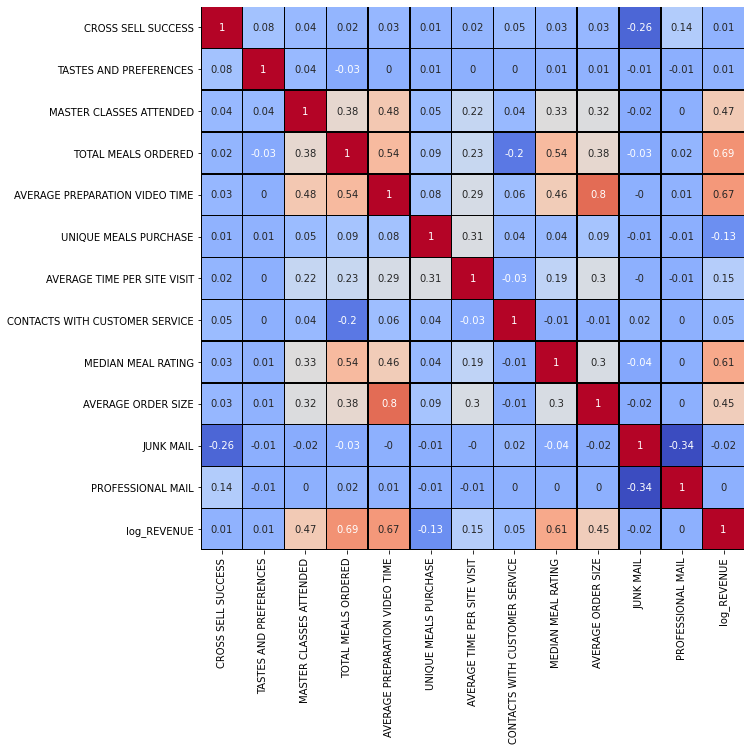


Our most robust variables are:

     a) Total Meals ordered
     
     b) Average preparation video time
     
     c) Median Mail Rating
     
     d) Master Class attended


In [21]:
KNN_variables_corr=['CROSS SELL SUCCESS',
'TASTES AND PREFERENCES', 
'MASTER CLASSES ATTENDED', 
'TOTAL MEALS ORDERED', 
'AVERAGE PREPARATION VIDEO TIME', 
'UNIQUE MEALS PURCHASE', 
#'PHOTO VIEWED', 
#'WITH WEEKLY PLAN',
'AVERAGE TIME PER SITE VISIT',
'CONTACTS WITH CUSTOMER SERVICE', 
'MEDIAN MEAL RATING', 
'AVERAGE ORDER SIZE', 
#'PRODUCT CATEGORIES VIEWED',
'JUNK MAIL',            
'PROFESSIONAL MAIL',
#'LARGE ORDER',
#'MEDIUM ORDER' ,
#'SMALL ORDER'
'log_REVENUE'                  
 ]
knn_corr_data  = apprentice_chef.loc[ : ,KNN_variables_corr]
df_corr_knn = knn_corr_data.corr().round(2)
# printing (Pearson) correlations with SalePrice
#print(df_corr_knn.loc['log_REVENUE'].sort_values(ascending = False))

# setting figure size
fig, ax = plt.subplots(figsize=(10,10))
# visualizing the correlation matrix
sns.heatmap(df_corr_knn,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)
plt.show()

print(f"""
Our most robust variables are:

     a) Total Meals ordered
     
     b) Average preparation video time
     
     c) Median Mail Rating
     
     d) Master Class attended""")

In [22]:
# INSTANTIATING a KNN model object
#calling libraries

from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.neighbors import KNeighborsClassifier

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler 
scaler.fit(model_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(model_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


X_scaled_df.columns = model_data.columns




# checking the results and selecting x variables 

KNN_data  = X_scaled_df.loc[ : ,KNN_variables]




In [23]:
# using standard data 
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            KNN_data,
            Revenue_log_target,
            test_size = 0.25,
            random_state = 219)


In [24]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1


In [25]:
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors =opt_neighbors)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test_STAND)



# SCORING the result
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(3))
print('KNN Testing Score :', knn_stand.score(X_test_STAND, y_test_STAND).round(3))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(3)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(3)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(3))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(3)

print(f"""
Using a KNN model increases our model score to 0.75, making it more reliable at the moment of predicting future revenue which is our main purpose. Also our train test gap is less than 0.05 which means the model is not over fitting. """)

KNN Training Score: 0.783
KNN Testing Score : 0.75
KNN Train-Test Gap: 0.033

Using a KNN model increases our model score to 0.75, making it more reliable at the moment of predicting future revenue which is our main purpose. Also our train test gap is less than 0.05 which means the model is not over fitting. 


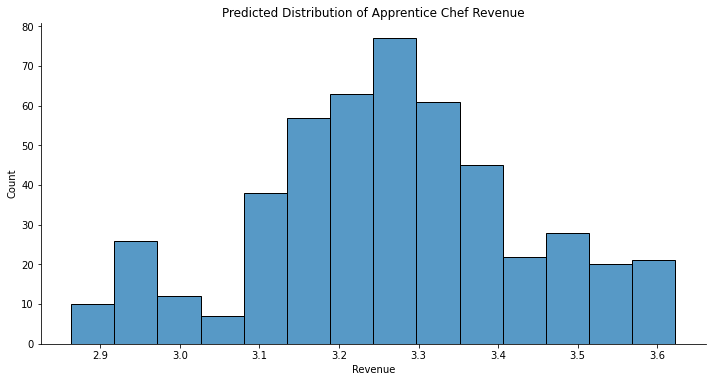

 Predicted Revenue Median :3.26
 
Our model prediction is really close to our real revenue median 3.25


In [26]:
knn_stand_pred_reg=10**knn_stand_pred

# Develop a histogram to analyze the distribution of the Y-variable.
sns.displot(data   = knn_stand_pred,
           
            height = 5,
            aspect = 2)



plt.title(label   = "Predicted Distribution of Apprentice Chef Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram 
plt.show()
print(f""" Predicted Revenue Median :{knn_stand_pred.mean().round(2)}""")

print(f""" 
Our model prediction is really close to our real revenue median 3.25""")

<h2>Part 2: Classification Model for Cross Selling Success </h2><br>

In [27]:
candidate_dict = {

'logit_sig'    : [
                    'MOBILE NUMBER',
                    'CANCELLATIONS BEFORE NOON',
                    'REFRIGERATED LOCKER',
                    'TASTES AND PREFERENCES',
                    'PC USER LOGINS',
                    'EARLY DELIVERIES',
                   # 'log_CONTACTS_W_CUSTOMER_SERVICE',
                    'JUNK MAIL',
                    'MASTER CLASSES ATTENDED',   
                    'PROFESSIONAL MAIL',
                   # 'log_TOTAL_MEALS_ORDERED'
                     'MEDIUM ORDER',
                    'SMALL ORDER'              
                    ]}




In [28]:
# train/test split with the chossen model
cross_selling_data   =  apprentice_chef.loc[ : , candidate_dict['logit_sig']]
cross_selling_target =  apprentice_chef.loc[ : ,'CROSS SELL SUCCESS']


# train test split 
X_train, X_test, y_train, y_test = train_test_split(
            cross_selling_data,
            cross_selling_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = cross_selling_target)



<h3>Creating a  Random Forest model</h3><br>

In [29]:
# INSTANTIATING a random forest model with default valuesyy
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [30]:
# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)





 The most important feature is Early Deliveries follow by cancellations before noon 


<ipython-input-2-addc68c46a96>:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


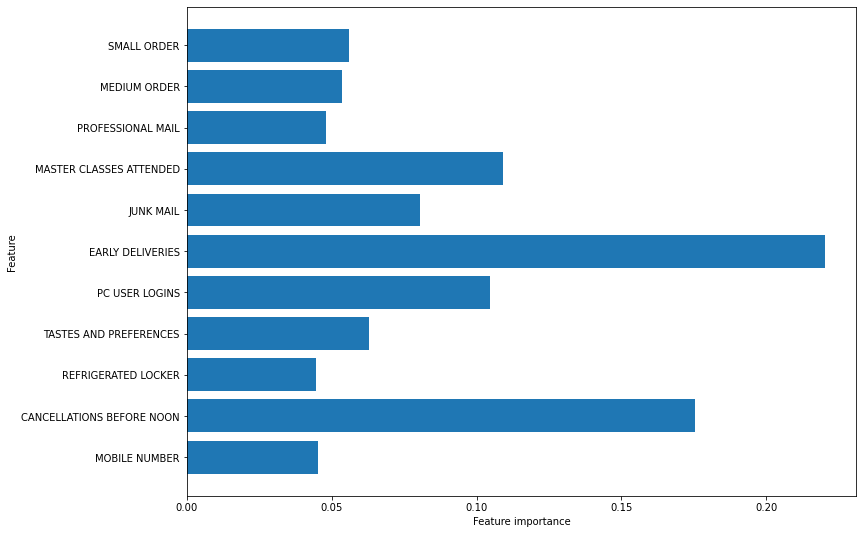

In [31]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = X_train,
                         export = False)


print(f""" The most important feature is Early Deliveries follow by cancellations before noon """)

<h3>Tuning the Random Forest</h3><br>

In [32]:
# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 5,
                               n_iter     = 250,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(cross_selling_data, cross_selling_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

<ipython-input-32-00f852164e0c>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space  = pd.np.arange(100, 1100, 250)
<ipython-input-32-00f852164e0c>:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space       = pd.np.arange(1, 31, 10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 48 is smaller than n_iter=250. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 350, 'min_samples_leaf': 1, 'criterion': 'entropy', 'bootstrap': True}
Tuned Training AUC: 0.5982


In [33]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = forest_cv.best_estimator_


# FIT step not needed


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned.predict(X_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(X_train, y_train).round(3))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(X_test, y_test).round(3))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(3))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(X_train, y_train).round(3) # accuracy
forest_tuned_test_score  = forest_tuned.score(X_test, y_test).round(3)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(3) # auc

print(f"""
The AUC Score is: {forest_tuned_auc}

This is a high realiable score, therefore we can   trust our model to classify correctly our clients  acceptance on cross-sell and avoid over fitting
""")

Forest Tuned Training ACCURACY: 0.885
Forest Tuned Testing  ACCURACY: 0.897
Forest Tuned AUC Score        : 0.86

The AUC Score is: 0.86

This is a high realiable score, therefore we can   trust our model to classify correctly our clients  acceptance on cross-sell and avoid over fitting



In [34]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


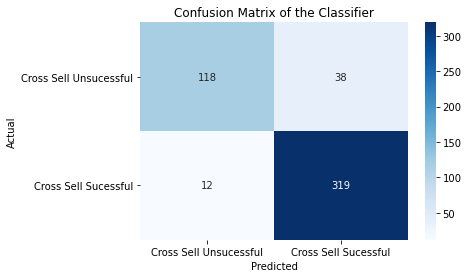

 
Our Model has a small error on False negatives (Accepted the cross-sell offer but was not detected), it is important to keep this value low, since losing one possible client means less revenue  


In [35]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = forest_tuned_pred,
          labels = ['Cross Sell Unsucessful', 'Cross Sell Sucessful'])

print(f""" 
Our Model has a small error on False negatives (Accepted the cross-sell offer but was not detected), it is important to keep this value low, since losing one possible client means less revenue  """)

<h2>Conclusion and future actions</h2><br>



a) Revenue Prediction: Preparation Video Time


*    The most significant factor is the time clients spent watching the food preparation videos. Therefore we need to keep them engaged since this reflects on growing revenue.

     To increase this factor, we can partner with local chefs or video-food bloggers to renovate our current recipes, sharing some essential "secrets" to increase the taste and improve the quality of your "gourmet" dish. Do "live" videos where our clients can have exclusive access to quick master classes.


b) Model Classifier: Early Deliveries 

* The most significant factor in accepting cross-selling is early deliveries. It is most likely if we increase our efficiency on deliveries, clients will get more products due to an increase in trust in the service. Before noon, cancellations also reflect a familiarity with the product and confidence in an efficient service: easy to order or cancel without any penalties or fees.
* As an action to take to increase the number of clients accepting the offer is to increase efficiency on the deliveries and create KPI's to keep track of the operations to encourage early deliveries  .


